# <font color='blue'>Problema de Estatística: Comparação de consumo de clientes novos e antigos</font>

# 1 - Definindo o problema de negócio

### Uma empresa de comércio eletrônico quer comparar o comportamento de compra de clientes novos e clientes antigos. A empresa deseja saber se há uma diferença significativa nas distribuições dos valores das compras entre esses dois grupos de clientes.

# 2 - Decisões

### O problema de negócio é estatístico. O teste Kolmogorov-Smirnov é adequado aqui porque:
### - Ele é um teste não paramétrico que não assume uma distribuição específica para os dados (por exemplo, normalidade).
### - Ele pode comparar duas distribuições empíricas para verificar se há diferenças significativas entre elas.

# 3 - Versão python e import dos pacotes utilizados

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [5]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [11]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

matplotlib: 3.8.4
pandas    : 2.2.2
numpy     : 1.26.4



# 4 - Criando os Conjuntos de dados

In [8]:
# Definindo os valores das compras dos clientes novos e antigos
np.random.seed(42)
compras_novos = np.random.normal(150, 30, 100)  # Média 150, desvio padrão 30
compras_antigos = np.random.normal(160, 25, 100)  # Média 160, desvio padrão 25

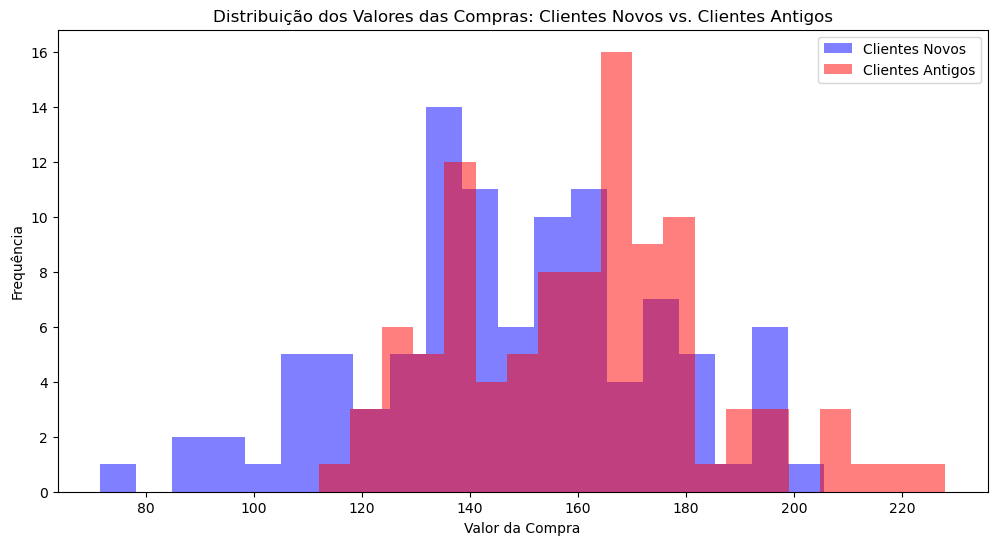

In [9]:
# Visualizando as distribuições com histogramas
plt.figure(figsize=(12, 6))
plt.hist(compras_novos, bins=20, alpha=0.5, label='Clientes Novos', color='blue')
plt.hist(compras_antigos, bins=20, alpha=0.5, label='Clientes Antigos', color='red')
plt.title('Distribuição dos Valores das Compras: Clientes Novos vs. Clientes Antigos')
plt.xlabel('Valor da Compra')
plt.ylabel('Frequência')
plt.legend()
plt.show()

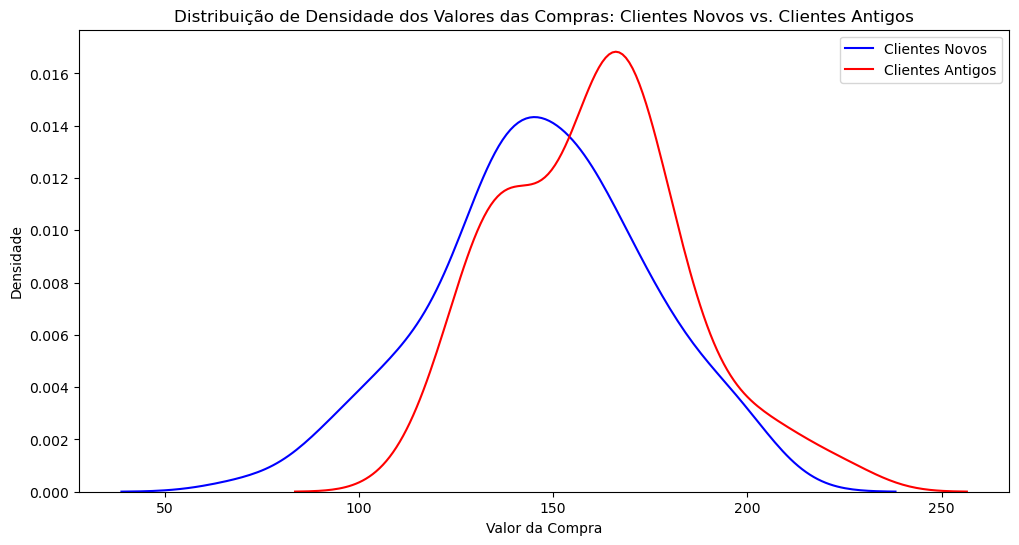

In [12]:
# Visualizando as distribuições com um gráfico de densidade
plt.figure(figsize=(12, 6))
sns.kdeplot(compras_novos, label='Clientes Novos', color='blue')
sns.kdeplot(compras_antigos, label='Clientes Antigos', color='red')
plt.title('Distribuição de Densidade dos Valores das Compras: Clientes Novos vs. Clientes Antigos')
plt.xlabel('Valor da Compra')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# 5 - Verificando as suposições, para aplicar o teste Kolmogorov-Smirnov:

## 5.1 Dados são numericamente contínuos

In [13]:
primeiras_10_compras_novos = compras_novos[:10]
print(primeiras_10_compras_novos)

[164.90142459 145.85207096 169.43065614 195.69089569 142.97539876
 142.97589129 197.37638447 173.02304187 135.91576842 166.27680131]


In [14]:
primeiras_10_compras_antigos = compras_antigos[:10]
print(primeiras_10_compras_antigos)

[124.61573145 149.48386693 151.43213709 139.94306827 155.96785721
 170.10127142 207.15464753 164.36444532 166.43875977 158.13885211]


### Os dados são numericamente contínuos

## 5.2 As amostras são independentes.

### As duas amostragens são aleatórias e independentes

# 6 - Teste de hipóteses

## 6.1 Teste Kolmogorov-Smirnov

In [15]:
# Realizando o Teste KS
stat, p = ks_2samp(compras_novos, compras_antigos)

## 6.2 Análise do resultado

In [16]:
print(f'Estatística KS: {stat}')
print(f'p-valor: {p}')

Estatística KS: 0.28
p-valor: 0.0007377026282063397


In [17]:
# Interpretação dos resultados
if p < 0.05:
    print("Rejeitamos a hipótese nula. As distribuições dos valores das compras são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as distribuições dos valores das compras são diferentes.")

Rejeitamos a hipótese nula. As distribuições dos valores das compras são significativamente diferentes.


In [ ]:
### Conclusão: 
### Rejeitamos a hipótese nula. 
### Há evidências estatísticas de que as distribuições dos valores das compras dos clientes antigos e novos são significativamente diferentes.

# Fim